# Notebook 0 - Introduction to the Data

## Section 0 - Import libraries and basic metadata

In [1]:
import os

import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd
import wfdb

from bc.beats import get_beats, get_beat_bank
from bc.io import ann_to_df
from bc.plot import plot_beat, plot_four_beats

base_dir = os.path.abspath('..')
data_dir = os.path.join(base_dir, 'data')

# Table of record names and the beat types they contain
beat_table = pd.read_csv(os.path.join(data_dir, 'beat-types.csv'), dtype={'record':object})
beat_table.set_index('record', inplace=True)

## Section 1 - Inspect signal and annotation content

,label_store,symbol,description,n_occurrences
2,2,L,Left bundle branch block beat,38
5,5,V,Premature ventricular contraction,1


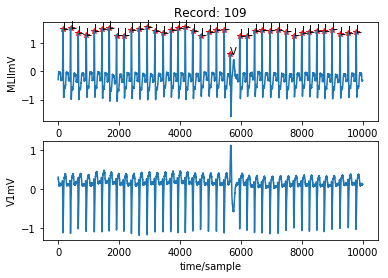

,label_store,symbol,description,n_occurrences
2,2,L,Left bundle branch block beat,31


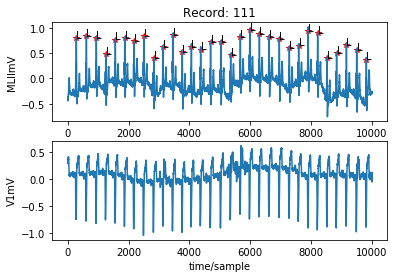

,label_store,symbol,description,n_occurrences
2,2,L,Left bundle branch block beat,12
3,3,R,Right bundle branch block beat,8
28,28,+,Rhythm change,4
5,5,V,Premature ventricular contraction,13


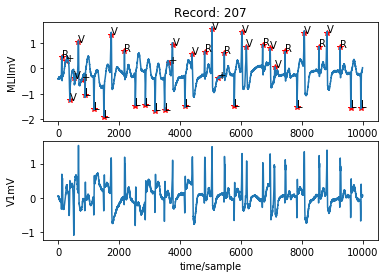

,label_store,symbol,description,n_occurrences
2,2,L,Left bundle branch block beat,31
28,28,+,Rhythm change,2
5,5,V,Premature ventricular contraction,5
14,14,~,Signal quality change,4


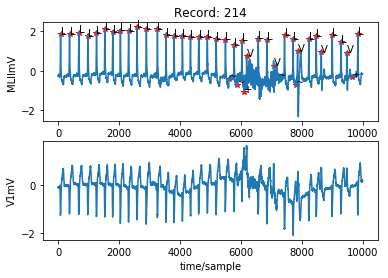

In [4]:
# Records with L: Left bundle branch block beat
l_records = beat_table.loc[beat_table['L']>0].index.values

# Visualize some records and annotations
for rec_name in l_records:
    # Load the signals and L beat annotations
    rec = wfdb.rdrecord(os.path.join(data_dir, rec_name), sampfrom=22000, sampto=32000)
    ann = wfdb.rdann(os.path.join(data_dir, rec_name), extension='atr',
                     sampfrom=22000, sampto=32000, shift_samps=True, summarize_labels=True)
    # Show the annotations contained in the files
    display(ann.contained_labels)
    # Get the peak samples and symbols in a dataframe. Keep only L beats.
    qrs_df = ann_to_df(ann, rm_sym=['+'])
    wfdb.plot_wfdb(record=rec, annotation=ann, plot_sym=True)     

len_left: 86 len_right: 219


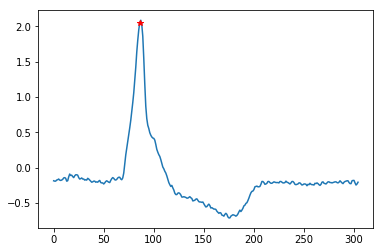

len_left: 94 len_right: 220


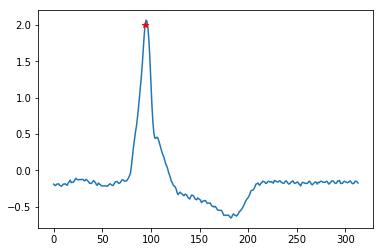

len_left: 94 len_right: 220


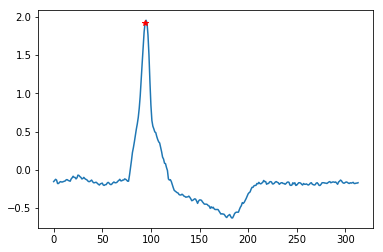

len_left: 94 len_right: 221


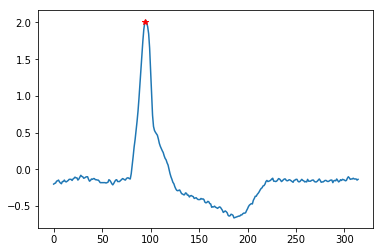

len_left: 95 len_right: 208


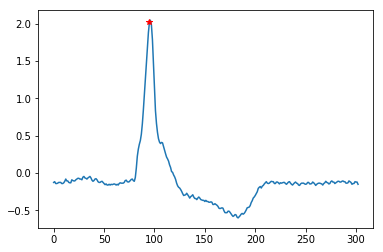

len_left: 89 len_right: 161


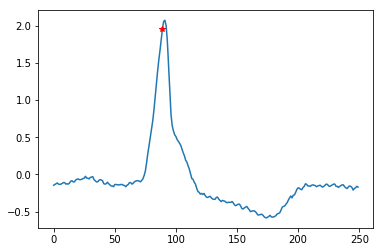

len_left: 103 len_right: 194


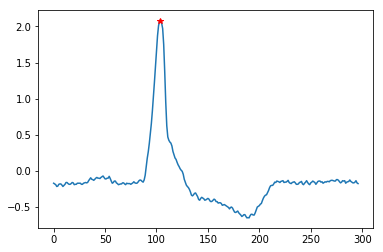

len_left: 83 len_right: 194


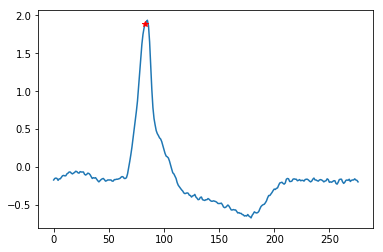

In [5]:
# Load a record, extract some beats, and view them.
sig, fields = wfdb.rdsamp(os.path.join(data_dir, rec_name), sampto=3000)
ann = wfdb.rdann(os.path.join(data_dir, rec_name), extension='atr', sampto=3000)
# Get the peak samples and symbols in a dataframe. Remove the non-beat annotations
qrs_df = ann_to_df(ann, rm_sym=['+', '~'])
beats, centers = get_beats(sig=sig[:, 0], qrs_inds=qrs_df['sample'].values, 
                           beat_types = qrs_df['symbol'].values, wanted_type='L',
                           view=True)

## Section 2 - Load and Visualize Beat Types

In [6]:
# Extract all available L beats
l_beats, l_centers = [], []
for rec_name in l_records:
    # Load the signals and L beat annotations
    sig, fields = wfdb.rdsamp(os.path.join(data_dir, rec_name))
    ann = wfdb.rdann(os.path.join(data_dir, rec_name), extension='atr')
    # Get the peak samples and symbols in a dataframe. Remove the non-beat annotations
    qrs_df = ann_to_df(ann, rm_sym=['+', '~'])
    beats, centers = get_beats(sig=sig[:, 0], qrs_inds=qrs_df['sample'].values, 
                           beat_types = qrs_df['symbol'].values, wanted_type='L')
    l_beats += beats
    l_centers += centers

### Normal Beats

In [2]:
n_beats, n_centers = get_beat_bank(data_dir=data_dir, beat_table=beat_table, wanted_type='N')

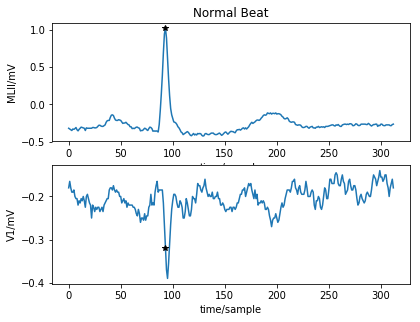

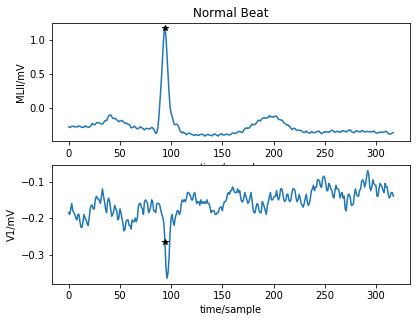

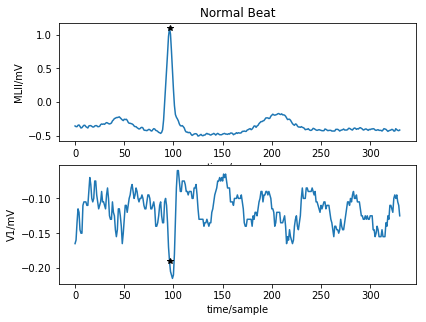

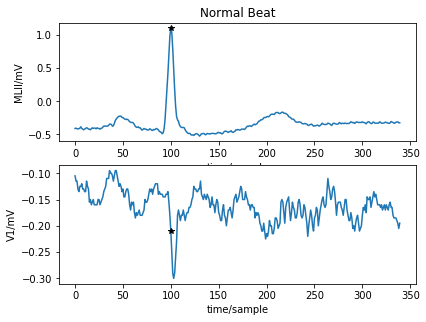

In [3]:
for i in range(4):
    plot_beat(n_beats[i], n_centers[i], title='Normal Beat')

### Left Bundle Branch Block

In [4]:
l_beats, l_centers = get_beat_bank(data_dir=data_dir, beat_table=beat_table, wanted_type='L')

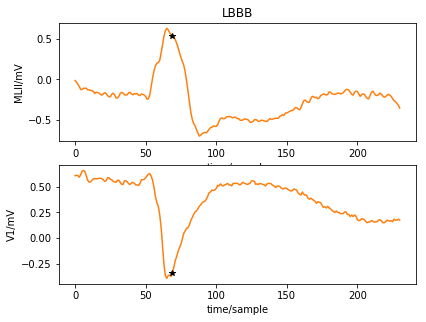

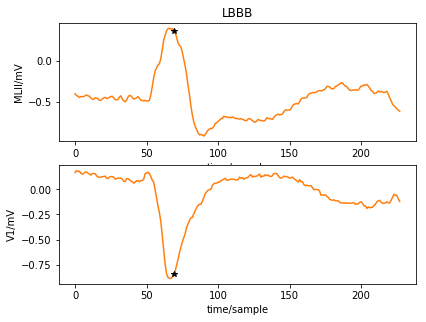

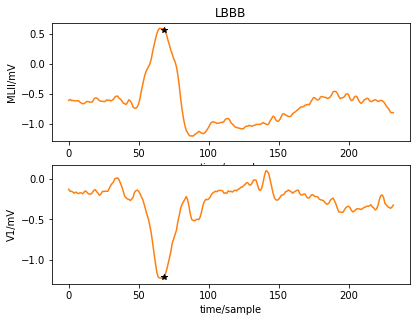

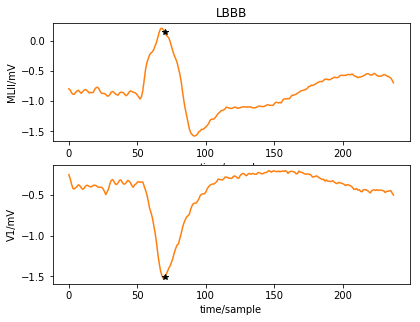

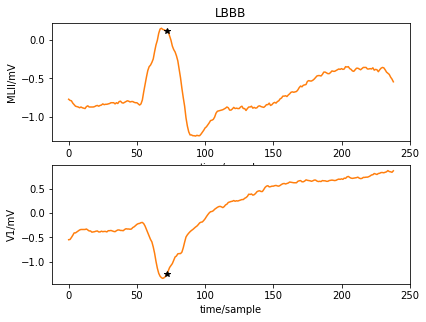

In [5]:
for i in range(5):
    plot_beat(l_beats[i], l_centers[i], style='C1', title='LBBB')

### Right Bundle Branch Block

In [6]:
r_beats, r_centers = get_beat_bank(data_dir=data_dir, beat_table=beat_table, wanted_type='R')

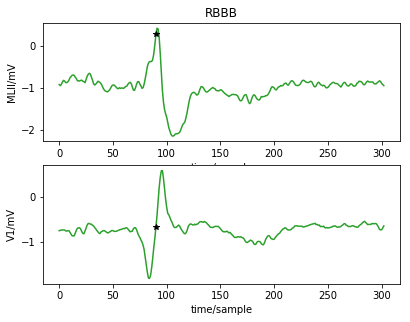

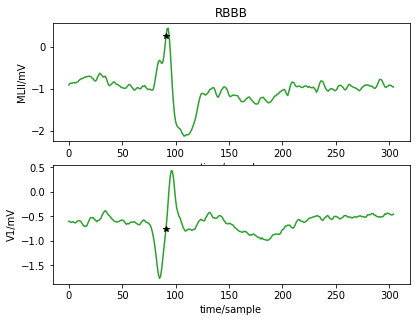

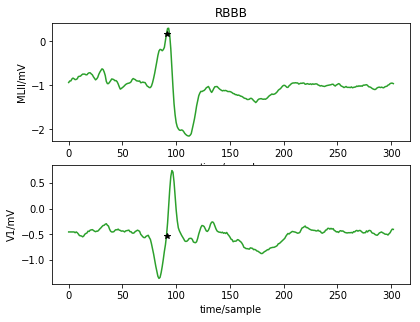

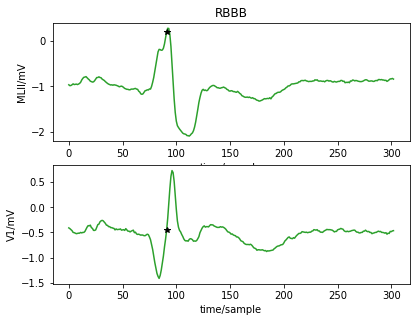

In [7]:
for i in range(4):
    plot_beat(r_beats[i], r_centers[i], style='C2', title='RBBB')

### Ventricular Premature Beat

In [8]:
v_beats, v_centers = get_beat_bank(data_dir=data_dir, beat_table=beat_table, wanted_type='V')

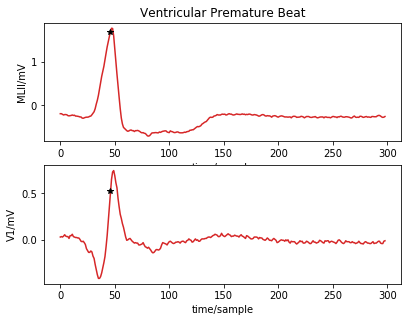

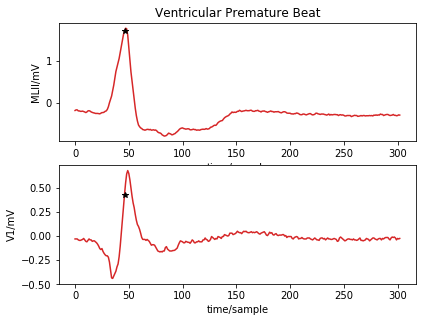

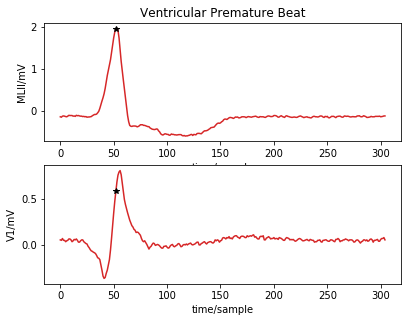

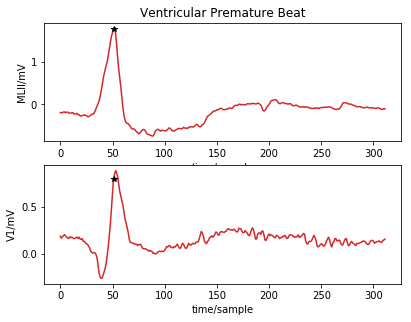

In [9]:
for i in range(4):
    plot_beat(v_beats[i], v_centers[i], style='C3', title='Ventricular Premature Beat')

In [10]:
%matplotlib qt

In [11]:
# Compare all beats
plot_four_beats(beats=[n_beats[0], l_beats[0], r_beats[0], v_beats[0]],
                centers=[n_centers[0], l_centers[0], r_centers[0], v_centers[0]])